In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Generated_data')
df.iloc[56]

Unnamed: 0                   56.000000
Pregnancies                   2.000000
Glucose                     135.000000
BloodPressure                25.000000
SkinThickness                 0.000000
Insulin                       0.000000
BMI                          15.334567
DiabetesPedigreeFunction      0.354901
Age                          37.000000
Outcome                       0.000000
Name: 56, dtype: float64

In [3]:
df = df.values
df[56]

array([ 56.        ,   2.        , 135.        ,  25.        ,
         0.        ,   0.        ,  15.33456705,   0.3549013 ,
        37.        ,   0.        ])

In [4]:
X = df[:,1:9]
y = df[:,9]


In [5]:
X[56]

array([  2.        , 135.        ,  25.        ,   0.        ,
         0.        ,  15.33456705,   0.3549013 ,  37.        ])

In [6]:
y[56]

0.0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [10]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.0001,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.random.rand(X_train.shape[1])

        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.clip((np.dot(X_test,self.coef_) + self.intercept_),0,1)/100


In [11]:
sgd = SGDRegressor(learning_rate=0.0001,epochs=40)

In [12]:
start = time.time()
sgd.fit(X_train_scaled,y_train)
print("The time taken is",time.time() - start)

0.3803453825603766 [ 0.07243564  0.15133668 -0.00912413  0.02019326 -0.01074781  0.06364677
  0.03271671 -0.00694386]
The time taken is 0.41224026679992676


In [13]:
sgd.coef_

array([ 0.07243564,  0.15133668, -0.00912413,  0.02019326, -0.01074781,
        0.06364677,  0.03271671, -0.00694386])

In [14]:
sgd.intercept_

0.3803453825603766

In [15]:
y_pred = sgd.predict(X_test)
y_pred

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.

In [16]:
accuracy_score(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
mse

336.43702006373815

In [ ]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [ ]:
X,y = load_diabetes(return_X_y=True)


In [ ]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
accuracy_score(y_test,y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

In [ ]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [ ]:
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)

/tmp/ipykernel_3491/1778098861.py:21: RuntimeWarning: overflow encountered in scalar multiply
  intercept_der = -2 * (y_train[idx] - y_hat)
/tmp/ipykernel_3491/1778098861.py:24: RuntimeWarning: overflow encountered in multiply
  coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])


nan [nan nan nan nan nan nan nan nan]
The time taken is 0.4288468360900879


In [ ]:
def Stochastic_gradient_descent(x,y, alpha, iterations):

    costIteration = []  # For storing the cost function at each iteration
    theta = np.ones((1,x.shape[1]))# Initializing thetas with 0s

    m = y.size


    for i in range(iterations):
      index=np.random.randint(0,x.shape[1]-1)
      x_sample=x[index,:]
      y_sample=y[index]
      h = x_sample.dot(theta.T)
      diff=h-y_sample
      theta = theta - alpha*(diff[0]*x_sample)
    return theta

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
j=0.01
k=800
theta=Stochastic_gradient_descent(X_train, y_train, alpha=j, iterations=k)[0]
print(theta)
prediction_t=[]
for i in range(len(X_train)):
    prediction=round(np.clip(X_train[i,:].dot(theta),0,1))
    prediction_t.append(prediction)

ConfusionMatrixDisplay(confusion_matrix(y_train,prediction_t)).plot()
print(accuracy_score(y_train,prediction_t))

[nan nan nan nan nan nan nan nan]


/tmp/ipykernel_11541/1864798115.py:15: RuntimeWarning: overflow encountered in multiply
  theta = theta - alpha*(diff[0]*x_sample)
/tmp/ipykernel_11541/1864798115.py:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha*(diff[0]*x_sample)


ValueError: cannot convert float NaN to integer

In [ ]:


# Read the data
Synthetic_data = pd.read_csv(r"Generated_data")


X1=Synthetic_data.iloc[:,1:9]
for i in X1.columns:
    X1[i]=(X1[i]-X1[i].mean())/X1[i].std()
X1.insert(0, 'Ones', 1)

X=X1.iloc[0:800,:]
Y=Synthetic_data.iloc[0:800:,9:10]

x_t=X1.iloc[800:,:]
y_t=Synthetic_data.iloc[800:,9:10]
#Y=Y.astype(float)

[ 0.56686962  0.42104778 -0.36305198 -0.02647819 -0.19367761  0.44672147
  0.09491242  0.13901375  0.37635351]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
0.505


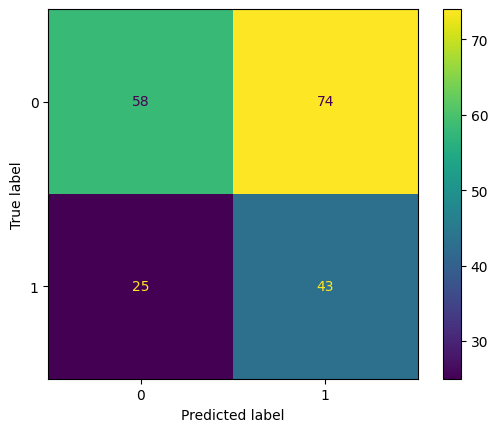

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def Stochastic_gradient_descent(x,y, alpha, iterations):

    costIteration = []  # For storing the cost function at each iteration
    theta = np.ones((1,x.shape[1]))# Initializing thetas with 0s

    m = y.size


    for i in range(iterations):
      index=np.random.randint(0,x.shape[1]-1)
      x_sample=x.loc[index,:]
      y_sample=y.loc[index,:]
      h = x_sample.dot(theta.T)
      diff=h-y_sample.values
      theta = theta - alpha*(diff[0]*x_sample.values)
    return theta


j=0.01
k=800
theta=Stochastic_gradient_descent(X, Y, alpha=j, iterations=k)[0]
print(theta)
prediction_t=[]

for i in x_t.index:
    prediction=round(np.clip(x_t.loc[i,:].dot(theta),0,1))
    prediction_t.append(prediction)
print(prediction_t)
ConfusionMatrixDisplay(confusion_matrix(y_t,prediction_t)).plot()
print(accuracy_score(y_t,prediction_t))

In [24]:
from sklearn.linear_model import SGDClassifier,Lasso, RidgeClassifier, LogisticRegression

In [19]:
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train,y_train)
y_pred = LogisticRegression.predict(X_test)
accuracy_score(y_test,y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.72

In [21]:
RidgeClassifier = RidgeClassifier()
RidgeClassifier.fit(X_train,y_train)
y_pred = RidgeClassifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.71

In [25]:
SGDClassifier = SGDClassifier()
SGDClassifier.fit(X_train,y_train)
y_pred = SGDClassifier.predict(X_test)
accuracy_score(y_test,y_pred)


0.415